___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and Pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
**NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!**
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use Pandas to read data directly from Google Finance!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas data-reader allows you to read stock information directly from the internet. Use the links for installation guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
# The data module downloads data from Yahoo Finance
# The wb module downloads data from World Bank
from pandas_datareader import data, wb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

## Data

We need to get data using Pandas data-reader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup Inc.
* The Goldman Sachs Group, Inc.
* JPMorgan Chase & Co
* Morgan Stanley
* Wells Fargo & Company

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate DataFrame, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pydata.github.io/pandas-datareader/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API, e.g. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
# Dates
start_date = datetime.datetime(2006, 1, 1)

end_date = datetime.datetime(2016, 1, 1)

In [6]:
# Read in each bank's data separately:

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start_date, end_date)

# CitiGroup
CG = data.DataReader("C", 'yahoo', start_date, end_date)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start_date, end_date)

# JP Morgan
JPM = data.DataReader("JPM", 'yahoo', start_date, end_date)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start_date, end_date)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start_date, end_date)

TypeError: string indices must be integers

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [3]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [ ]:
bank_stocks = pd.concat([BAC, CG, GS, JPM, MS, WFC], axis=1, keys=tickers)

**Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

**Check the head of the bank_stocks dataframe.**

In [ ]:
bank_stocks.head()

Another way to set up stock data is add each bank info in For Loop:

In [ ]:
# Create an empty DataFrame

df = pd.DataFrame()

# Get the data for each ticker in For Loop

for ticker in tickers:
    stocks = data.DataReader(ticker, 
                             start=start_date, 
                             end=end_date, 
                             data_source='yahoo')
                
# Add to the empty DataFrame

bank_stocks = pd.concat([df, stocks], axis=1)

## Pickle file

If you get TypeError message when trying to read the data in from each bank ('string indices must be integers'), there is a **pickle file** prepared in your working folder with all the stock data. 

There is a [fix](https://stackoverflow.com/questions/71696014/pandas-datareader-not-able-to-pull-from-yahoo-finance-unable-to-read-url-with-r) for the TypeError that has been posted on Stack Overflow (due to recent issues with Pandas data-reader), which you can try at a later date.

In [4]:
df = pd.read_pickle('all_banks')

In [5]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [22]:
df['GS']['Volume']

Date
2006-01-03    6188700
2006-01-04    4862000
2006-01-05    3717600
2006-01-06    4319600
2006-01-09    4723500
               ...   
2015-12-24    1107633
2015-12-28    1723330
2015-12-29    1848921
2015-12-30    1514347
2015-12-31    1773881
Name: Volume, Length: 2517, dtype: int64

When processing large amounts of data, or performing extensive pre-processing work, it can take hours of work. **Pickle** files are non-readable **binary** bytes of information used to save your processed data. Pandas has a `read_pickle()` function just for the occasion.

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use `.xs()`, since that will be a major part of this project.

**What is the maximum Close price for each bank's stock throughout the time period?**

In [6]:
df.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [ ]:
# Closing price refers to the last price at which a stock trades during a regular trading session
# High close is stock manipulation tactic, when stocks are sold at high price during the final minutes of trading

**Create a new empty DataFrame called 'returns'. This dataframe will contain the returns for each bank's stock.** 

**Bank returns are typically defined by the following formula** (where *P* is price):

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Essentially, it is the price of a day divided by the price of the previous day, minus one, i.e. percentage of returns at given time.

In [7]:
returns = pd.DataFrame()

**We can use Pandas `pct_change()` method on the Close column to create a column representing the return value. Use a For loop that goes through the stock data and for each Bank Stock Ticker creates the 'returns' column and sets it as a column in the 'returns' empty DataFrame.**

In [8]:
for ticker in tickers:
    returns[ticker] = df[ticker]['Close'].pct_change()

In [9]:
returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [ ]:
# It makes sense that the top row contains null values because you cannot get returns on the 1st day 
# (there's no past to compare to)

**Create a pairplot using Seaborn of the 'returns' DataFrame. What stock stands out to you? Can you figure out why?**

In [10]:
# Remove row with null values
returns[1:]

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000947
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


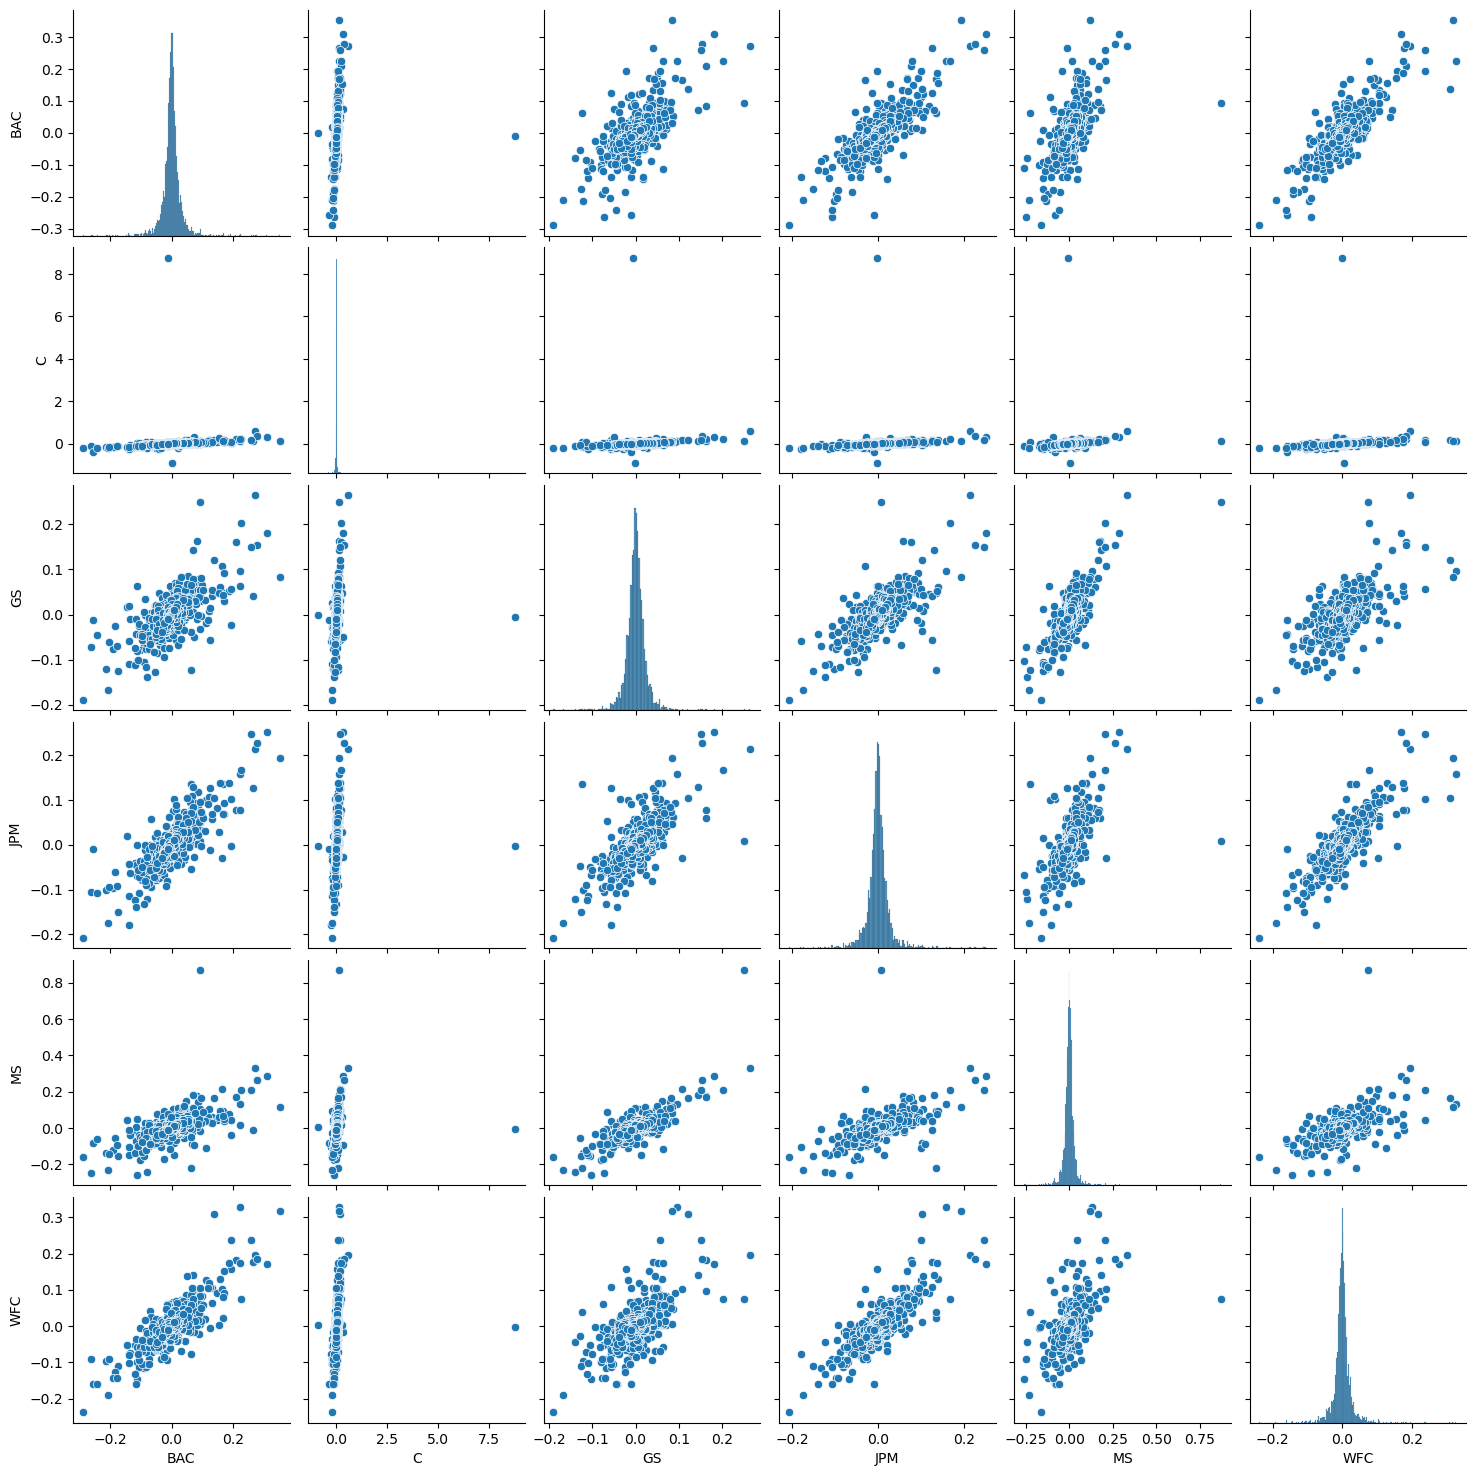

In [11]:
sns.pairplot(returns[1:]);

There is some correlations but mostly there is an enormous crash in returns for CitiGroup. where the data points fall at zero for that bank. 

The 2007–2008 financial crisis, or Global Financial Crisis (GFC), was a severe worldwide economic crisis. In 2008 CitiGroup had a huge stock crash and became insolvent. They pretty much closed down to the bare bones until 2009.

**Using the 'returns' DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [12]:
# Worst day for returns

returns.idxmin()

BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

Bank of America, Goldman Sachs, JP Morgan and Wells Fargo had worst returns on the same day - 20th Jan 2009.

On 20th January 2009, Icelandic financial crisis protests intensified before the Icelandic government collapsed in the following days. It was also Barack Obama's inauguration date...market investors get panicky during political changes.

In [13]:
# Best day for returns
# Citigroup worst and best days are 3 days apart in May 2011.
# JP Morgan had best returns day after its worst day.
# Morgan Stanley worst and best days are 4 days apart in October 2008.

returns.idxmax()

BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

The US government sold its minority stake in Citigroup for 12 billion dollars profit. A one-to-ten **reverse stock split** in March 2011 boosted the stock's share price back to above 40 dollars, but the stock dropped back to as low as 21.40 dollars during May 2011 Eurozone debt crisis.

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
# Overall, CitiGroup is the riskiest due to large variations in returns (stocks going up and down)
returns.std()

BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

In [15]:
# For 2015, all banks share similar risk profiles, but Morgan Stanley and Bank of America are the most risky
returns['2015-01-01':'2015-12-31'].std()

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

**Create a displot or histplot using Seaborn of the 2015 returns for Morgan Stanley (include KDE line)**

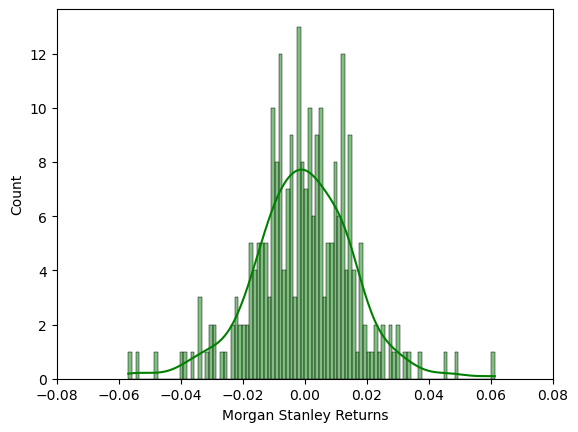

In [18]:
sns.histplot(returns['2015-01-01':'2015-12-31']['MS'], bins=100, color='green', kde=True)
plt.xlim(-0.08, 0.08)
plt.xlabel('Morgan Stanley Returns');

In [ ]:
# Distribution of returns is pretty stable - normal distribution with max 0.06 deviation from the mean

**Create a displot or histplot using Seaborn of the 2008 returns for CitiGroup**

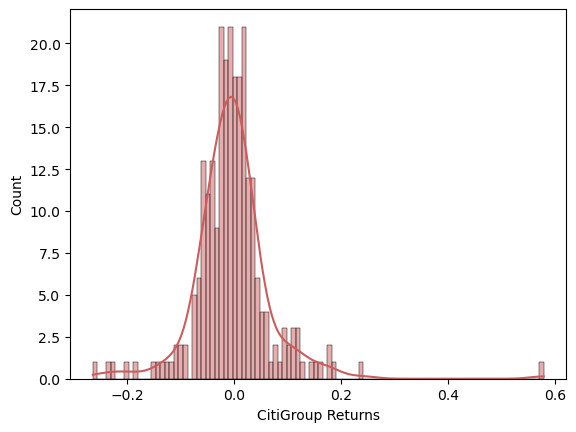

In [19]:
sns.histplot(returns['2008-01-01':'2008-12-31']['C'], bins=100, color='indianred', kde=True)
plt.xlabel('CitiGroup Returns');

In [ ]:
# Standard deviations from the mean are more stretched out (almost 0.6) to almost 10x more than Morgan Stanley

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below: Seaborn, Matplotlib, Plotly and Cufflinks, or just Pandas.

### Imports

In [23]:
sns.set_style('whitegrid')

# Optional Plotly Imports for moving averages visualizations
import plotly
import cufflinks as cf

cf.go_offline()

**Create a line plot showing Close price for each bank over the entire index of time. (Hint: Try using For Loop, or [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

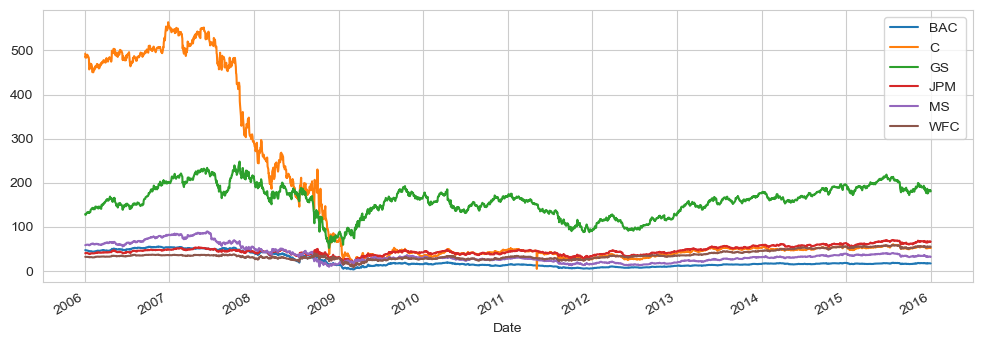

In [48]:
# Using For Loop

for ticker in tickers:
    df[ticker]['Close'].plot(figsize=(12, 4), label=ticker)
    
plt.legend();

In [ ]:
# CitiGroup crashed after 2008
# Goldman Sachs dips in 2009 but bounces back quite quickly
# The other bank stocks were not affected as much as CitiGroup and Goldman Sachs

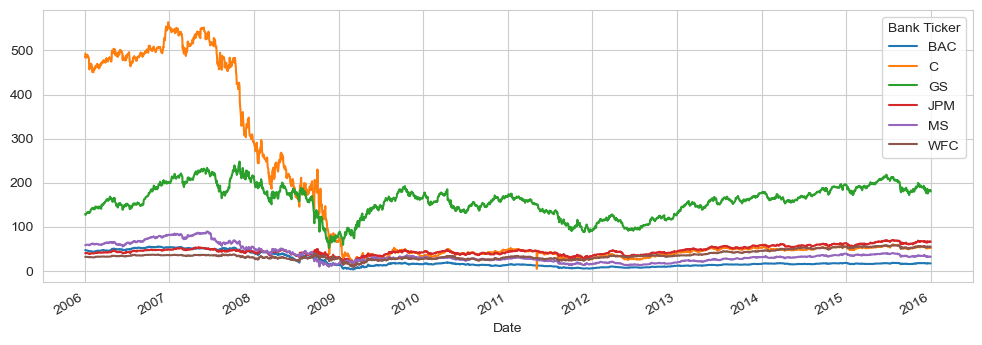

In [52]:
# Using xs() to cross-section data

df.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12, 4));

In [24]:
# Using Plotly with xs()

df.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

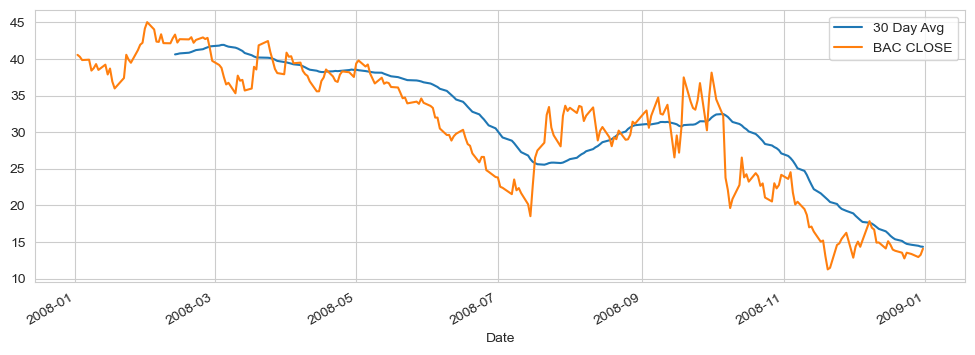

In [29]:
plt.figure(figsize=(12, 4))

df['2008-01-01':'2009-01-01']['BAC']['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
df['2008-01-01':'2009-01-01']['BAC']['Close'].plot(label='BAC CLOSE')
plt.legend();

In [ ]:
# Allows you to see general trend of closing stock price 

**Create a heatmap of the correlation between the stocks Close Price.**

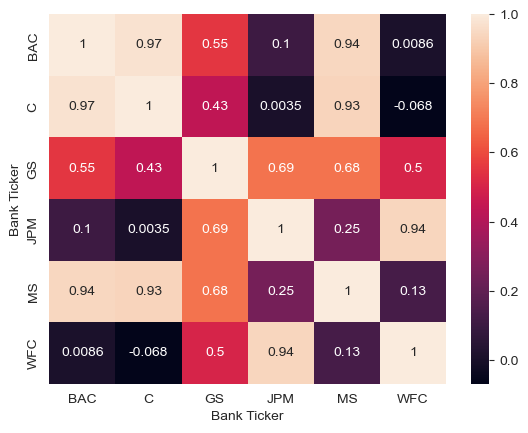

In [31]:
sns.heatmap(df.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True);

In [ ]:
# Bank of America and CitiGroup and Morgan Stanley are all strongly correlated with each other
# JP Morgan and Wells Fargo are also strongly correlated 

**Optional: Use Seaborn's clustermap to cluster the correlations together:**

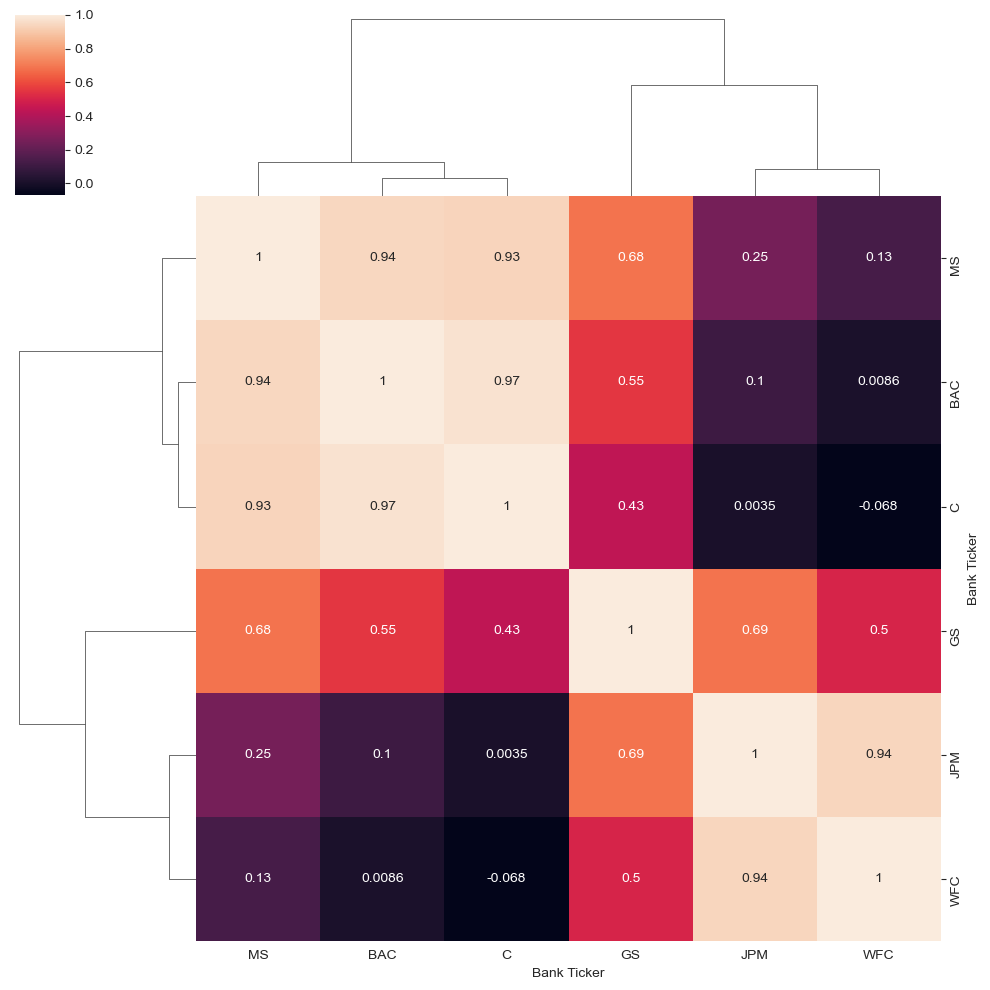

In [33]:
sns.clustermap(df.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True);

In [ ]:
# Can see the two correlated clusters more clearly

In [34]:
closing_corr = df.xs(key='Close', axis=1, level='Stock Info').corr()

closing_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the *Cufflinks* library to create some **Technical Analysis** plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use `.iplot(kind='candle)` to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [35]:
df['2015-01-01':'2016-01-01']['BAC'][['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

In [ ]:
# Candlestick plots 'describe' stock movements
# They tell you whether the stock price went up (green) or down (red) on a given date

**Use `.ta_plot(study='sma')` to create Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [36]:
df['2015-01-01':'2016-01-01']['MS']['Close'].ta_plot(study='sma', periods=[13, 21, 55], title='Simple Moving Averages')

In [ ]:
# Simple Moving Averages reveals the trend of stock prices

**Use `.ta_plot(study='boll')` to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [37]:
df['2015-01-01':'2016-01-01']['BAC']['Close'].ta_plot(study='boll')

In [ ]:
# Bollinger Band plots show the standard deviation of stock prices over time

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.